# Business Analytics Assignment2

#### Use only ‘train.csv’, ‘store.csv’


## (1) Select input(explanatory) variables to predict sales
- List variables used in learning with explanation. 


In [1]:
import pandas as pd
import numpy as np

#data load
train=pd.read_csv(r'D:\파일\3학년\3-2\Business Analytics\assignment\2\train.csv', sep=',')
store=pd.read_csv(r'D:\파일\3학년\3-2\Business Analytics\assignment\2\store.csv', sep=',')

#Merge data
df = pd.merge(train, store, how = 'inner', on = 'Store')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12400\1333895011.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv(r'D:\파일\3학년\3-2\Business Analytics\assignment\2\train.csv', sep=',')


## (2) Add new variables (feature engineering)
- Include variables generated from Promo2 and Promo2Interval
- Include variable(s) from CompetitionDistance
- Include variable(s) from CompetitionOpenSince[Month/Year]
- Include new variable(s) from historical sales or number of customers 


In [2]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    
split_date(df)

In [3]:
#Include variables generated from Promo2 and Promo2Interval
# NewPromo2: Whether a new round of promotions was started in the current month
#I also added 'NowPromo2' generated from Date,Promo2SinceYear,Promo2SinceWeek
# NowPromo2: Whether the store is currently participating in promotion 2 or not

def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

    
def promo_cols(df):
    # Promo2Open: Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    
    # NowPromo2: Whether the store is currently participating in promotion 2 or not
    df['NowPromo2'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else 1).fillna(0) * df['Promo2']
    
    # NewPromo2: Whether a new round of promotions was started in the current month
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    df['NewPromo2'] = df.apply(check_promo_month, axis=1) * df['Promo2']
    
promo_cols(df)

df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,Promo2Open,NowPromo2,NewPromo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,0.000000,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,30,31,0.000000,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,29,31,0.000000,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,28,31,0.000000,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,27,31,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,5,1,7.180328,1,0
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,4,1,7.180328,1,0
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,3,1,7.180328,1,0
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,1,7.180328,1,0


In [4]:
#Include variable(s) from CompetitionDistance
#CompetitionLevel: the degree of competition according to distance The higher it is, the more competitive

df['CompetitionLevel']=1/df.CompetitionDistance**0.5
df['CompetitionLevel']=df['CompetitionLevel'].fillna(0)

df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,Promo2Open,NowPromo2,NewPromo2,CompetitionLevel
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,2015,7,31,31,0.000000,0,0,0.028061
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,NaN,2015,7,30,31,0.000000,0,0,0.028061
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,NaN,2015,7,29,31,0.000000,0,0,0.028061
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,NaN,2015,7,28,31,0.000000,0,0,0.028061
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,NaN,2015,7,27,31,0.000000,0,0,0.028061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,2012.0,"Mar,Jun,Sept,Dec",2013,1,5,1,7.180328,1,0,0.013672
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,2012.0,"Mar,Jun,Sept,Dec",2013,1,4,1,7.180328,1,0,0.013672
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,2012.0,"Mar,Jun,Sept,Dec",2013,1,3,1,7.180328,1,0,0.013672
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,1,7.180328,1,0,0.013672


In [5]:
#Include variable(s) from CompetitionOpenSince[Month/Year]
#CompetitionOpen: Months since Competition was open

def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

comp_months(df)
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Year,Month,Day,WeekOfYear,Promo2Open,NowPromo2,NewPromo2,CompetitionLevel,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,2015,7,31,31,0.000000,0,0,0.028061,82.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,NaN,2015,7,30,31,0.000000,0,0,0.028061,82.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,NaN,2015,7,29,31,0.000000,0,0,0.028061,82.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,NaN,2015,7,28,31,0.000000,0,0,0.028061,82.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,NaN,2015,7,27,31,0.000000,0,0,0.028061,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",2013,1,5,1,7.180328,1,0,0.013672,0.0
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",2013,1,4,1,7.180328,1,0,0.013672,0.0
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",2013,1,3,1,7.180328,1,0,0.013672,0.0
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,"Mar,Jun,Sept,Dec",2013,1,2,1,7.180328,1,0,0.013672,0.0


In [6]:
#Include new variable(s) from historical sales or number of customers
#SalesPerCustomer:Average sales per customer

df['SalesPerCustomer'] = df['Sales']/df['Customers']
df['SalesPerCustomer'] = df['SalesPerCustomer'].fillna(0)

df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Year,Month,Day,WeekOfYear,Promo2Open,NowPromo2,NewPromo2,CompetitionLevel,CompetitionOpen,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2015,7,31,31,0.000000,0,0,0.028061,82.0,9.482883
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,2015,7,30,31,0.000000,0,0,0.028061,82.0,9.194139
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,2015,7,29,31,0.000000,0,0,0.028061,82.0,9.143403
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,2015,7,28,31,0.000000,0,0,0.028061,82.0,8.948214
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,2015,7,27,31,0.000000,0,0,0.028061,82.0,9.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,2013,1,5,1,7.180328,1,0,0.013672,0.0,14.073746
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,2013,1,4,1,7.180328,1,0,0.013672,0.0,13.926380
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,2013,1,3,1,7.180328,1,0,0.013672,0.0,14.323333
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,2013,1,2,1,7.180328,1,0,0.013672,0.0,12.121311


In [7]:
#10 input variables:'Promo', 'DayOfWeek', 'Assortment', 'StoreType','WeekOfYear','NowPromo2','NewPromo2','CompetitionLevel','CompetitionOpen','SalesPerCustomer'
df = df[['Year', 'Sales', 'Promo', 'DayOfWeek', 'Assortment', 'StoreType','WeekOfYear','NowPromo2','NewPromo2','CompetitionLevel','CompetitionOpen','SalesPerCustomer']]

df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Year              1017209 non-null  int64  
 1   Sales             1017209 non-null  int64  
 2   Promo             1017209 non-null  int64  
 3   DayOfWeek         1017209 non-null  int64  
 4   Assortment        1017209 non-null  object 
 5   StoreType         1017209 non-null  object 
 6   WeekOfYear        1017209 non-null  UInt32 
 7   NowPromo2         1017209 non-null  int64  
 8   NewPromo2         1017209 non-null  int64  
 9   CompetitionLevel  1017209 non-null  float64
 10  CompetitionOpen   1017209 non-null  float64
 11  SalesPerCustomer  1017209 non-null  float64
dtypes: UInt32(1), float64(3), int64(6), object(2)
memory usage: 98.0+ MB


## (3) Split data
- Training set: use samples in 2013 and 2014
- Test set: use samples in 2015


In [8]:
Train = df[df['Year'].isin([2013,2014])]
Test = df[df['Year']==2015]

x_trainval = Train.drop('Sales', axis=1)
y_trainval = Train.Sales
x_test = Test.drop('Sales', axis=1)
y_test = Test.Sales

## (4) Hyperparameter search with cross validation (only using training set)
- Use ridge and lasso regression models respectively
- Use 5-fold cross validation
- Calculate R2, MSE, MAE
- Find the best hyperparameters for each model


In [9]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [ ]:
#I tried to run this code, but it didn't work because of the limitations of my laptop's performance)



# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# scaler = StandardScaler()

# for alpha in np.logspace(-4, 1, 30): # candidates for alpha
    
#     alpha_settings=[]
#     alpha_settings.append(alpha)
    
#     r2_val = []
#     mse_val = []
#     mae_val = []
    
#     avg_r2=[]
#     avg_mse=[]
#     avg_mae=[]
    
#     for train_idx, val_idx in kfold.split(x_trainval, y_trainval):
        
#         x_train = x_trainval.iloc[train_idx]
#         y_train = y_trainval.iloc[train_idx]
#         x_val = x_trainval.iloc[val_idx]
#         y_val = y_trainval.iloc[val_idx]
        
#         x_train_cat = x_train[['Promo','DayOfWeek','Assortment','StoreType','NowPromo2','NewPromo2']]
#         x_train_num = x_train[['CompetitionLevel','CompetitionOpen','SalesPerCustomer']]
        
#         x_val_cat = x_val[['Promo','DayOfWeek','Assortment','StoreType','NowPromo2','NewPromo2']]
#         x_val_num = x_val[['CompetitionLevel','CompetitionOpen','SalesPerCustomer']]
        
        
#         # For x_train_cat and x_val_cat, apply onehotencoding
#         ohe = OneHotEncoder(sparse=False)
#         ohe.fit(x_train_cat)

#         x_train_cat_ohe = ohe.transform(x_train_cat)
#         x_val_cat_ohe = ohe.transform(x_val_cat)


#         # For x_train_num and x_val_num, apply standardscaler
#         scaler = StandardScaler()
#         scaler.fit(x_train_num)

#         x_train_num_scaled = scaler.transform(x_train_num)
#         x_val_num_scaled = scaler.transform(x_val_num)
        
        
#         # concatenate them agin into x_train and X_val. 
#         x_train_trans = np.concatenate([x_train_cat_ohe, x_train_num_scaled], axis=1)
#         x_val_trans = np.concatenate([x_val_cat_ohe, x_val_num_scaled], axis=1)

        
#         # training is performed with the Lasso set to the current alpha.
#         lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
#         lasso.fit(x_train_trans, y_train)
        
#         y_val_hat= lasso.predict(x_val_trans)
        
#         # store r2 score,mse,mae 
#         r2_val.append(r2_score(y_val, y_val_hat))
#         mse_val.append(mean_squared_error(y_val, y_val_hat))
#         mae_val.append(mean_absolute_error(y_val, y_val_hat))
        
    
#     mean_r2 = np.mean(r2_val) # get the cross-validation score
#     avg_r2.append(mean_r2)
    
#     mean_mse = np.mean(mse_val)
#     avg_mse.append(mean_mse)
    
#     mean_mae = np.mean(mae_val)
#     avg_mae.append(mean_mae)

In [10]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scaler = StandardScaler()

x_trains = []
y_trains = []
x_vals = []
y_vals = []

for train_idx, val_idx in kfold.split(x_trainval, y_trainval):
        
        x_train = x_trainval.iloc[train_idx]
        y_train = y_trainval.iloc[train_idx]
        y_trains.append(y_train)
        
        x_val = x_trainval.iloc[val_idx]
        y_val = y_trainval.iloc[val_idx]
        y_vals.append(y_val)
        
        x_train_cat = x_train[['Promo','DayOfWeek','Assortment','StoreType','NowPromo2','NewPromo2']]
        x_train_num = x_train[['CompetitionLevel','CompetitionOpen','SalesPerCustomer']]
        
        x_val_cat = x_val[['Promo','DayOfWeek','Assortment','StoreType','NowPromo2','NewPromo2']]
        x_val_num = x_val[['CompetitionLevel','CompetitionOpen','SalesPerCustomer']]
        
        
        # For x_train_cat and x_val_cat, apply onehotencoding
        ohe = OneHotEncoder(sparse=False)
        ohe.fit(x_train_cat)

        x_train_cat_ohe = ohe.transform(x_train_cat)
        x_val_cat_ohe = ohe.transform(x_val_cat)


        # For x_train_num and x_val_num, apply standardscaler
        scaler = StandardScaler()
        scaler.fit(x_train_num)

        x_train_num_scaled = scaler.transform(x_train_num)
        x_val_num_scaled = scaler.transform(x_val_num)
        
        
        # concatenate them agin into x_train and X_val. 
        x_train_trans = np.concatenate([x_train_cat_ohe, x_train_num_scaled], axis=1)
        x_val_trans = np.concatenate([x_val_cat_ohe, x_val_num_scaled], axis=1)
        
        x_trains.append(x_train_trans)
        x_vals.append(x_val_trans)

## Lasso

In [111]:
# alphas=[]

# avg_r2=[]
# avg_mse=[]
# avg_mae=[]

# for alpha in np.logspace(-4, 0, 20):
    
#     alphas.append(alpha)
#     r2_val = []
#     mse_val = []
#     mae_val= []

    
#     for i in range(5):

#         lasso = Lasso(alpha = alpha, random_state=0)
#         lasso.fit(x_trains[i], y_trains[i])

#         y_val_hat= lasso.predict(x_vals[i])

#         r2_val.append(r2_score(y_vals[i], y_val_hat))
#         mse_val.append(mean_squared_error(y_vals[i], y_val_hat))
#         mae_val.append(mean_absolute_error(y_vals[i], y_val_hat))


#     mean_r2= np.mean(r2_val)
#     avg_r2.append(mean_r2)

#     mean_mse = np.mean(mse_val)
#     avg_mse.append(mean_mse)

#     mean_mae = np.mean(mae_val)
#     avg_mae.append(mean_mae)

C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.997e+10, tolerance: 9.267e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.995e+10, tolerance: 9.277e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.008e+10, toleranc

In [118]:
avg_r2=[]
avg_mse=[]
avg_mae=[]

r2_val = []
mse_val = []
mae_val= []

for i in range(5):

    lasso = Lasso(alpha = 1, random_state=0)
    lasso.fit(x_trains[i], y_trains[i])

    y_val_hat= lasso.predict(x_vals[i])

    r2_val.append(r2_score(y_vals[i], y_val_hat))
    mse_val.append(mean_squared_error(y_vals[i], y_val_hat))
    mae_val.append(mean_absolute_error(y_vals[i], y_val_hat))


mean_r2= np.mean(r2_val)
avg_r2.append(mean_r2)

mean_mse = np.mean(mse_val)
avg_mse.append(mean_mse)

mean_mae = np.mean(mae_val)
avg_mae.append(mean_mae)

In [119]:
r2_val = []
mse_val = []
mae_val= []

for i in range(5):

    lasso = Lasso(alpha = 0.1, random_state=0)
    lasso.fit(x_trains[i], y_trains[i])

    y_val_hat= lasso.predict(x_vals[i])

    r2_val.append(r2_score(y_vals[i], y_val_hat))
    mse_val.append(mean_squared_error(y_vals[i], y_val_hat))
    mae_val.append(mean_absolute_error(y_vals[i], y_val_hat))


mean_r2= np.mean(r2_val)
avg_r2.append(mean_r2)

mean_mse = np.mean(mse_val)
avg_mse.append(mean_mse)

mean_mae = np.mean(mae_val)
avg_mae.append(mean_mae)

In [120]:
r2_val = []
mse_val = []
mae_val= []

for i in range(5):

    lasso = Lasso(alpha = 0.01, random_state=0)
    lasso.fit(x_trains[i], y_trains[i])

    y_val_hat= lasso.predict(x_vals[i])

    r2_val.append(r2_score(y_vals[i], y_val_hat))
    mse_val.append(mean_squared_error(y_vals[i], y_val_hat))
    mae_val.append(mean_absolute_error(y_vals[i], y_val_hat))


mean_r2= np.mean(r2_val)
avg_r2.append(mean_r2)

mean_mse = np.mean(mse_val)
avg_mse.append(mean_mse)

mean_mae = np.mean(mae_val)
avg_mae.append(mean_mae)

C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.997e+10, tolerance: 9.267e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.995e+10, tolerance: 9.277e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.008e+10, toleranc

In [121]:
r2_val = []
mse_val = []
mae_val= []

for i in range(5):

    lasso = Lasso(alpha = 0.001, random_state=0)
    lasso.fit(x_trains[i], y_trains[i])

    y_val_hat= lasso.predict(x_vals[i])

    r2_val.append(r2_score(y_vals[i], y_val_hat))
    mse_val.append(mean_squared_error(y_vals[i], y_val_hat))
    mae_val.append(mean_absolute_error(y_vals[i], y_val_hat))


mean_r2= np.mean(r2_val)
avg_r2.append(mean_r2)

mean_mse = np.mean(mse_val)
avg_mse.append(mean_mse)

mean_mae = np.mean(mae_val)
avg_mae.append(mean_mae)

C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.577e+11, tolerance: 9.267e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+11, tolerance: 9.277e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+11, toleranc

In [123]:
r2_val = []
mse_val = []
mae_val= []

for i in range(5):

    lasso = Lasso(alpha = 0.0001, random_state=0)
    lasso.fit(x_trains[i], y_trains[i])

    y_val_hat= lasso.predict(x_vals[i])

    r2_val.append(r2_score(y_vals[i], y_val_hat))
    mse_val.append(mean_squared_error(y_vals[i], y_val_hat))
    mae_val.append(mean_absolute_error(y_vals[i], y_val_hat))


mean_r2= np.mean(r2_val)
avg_r2.append(mean_r2)

mean_mse = np.mean(mse_val)
avg_mse.append(mean_mse)

mean_mae = np.mean(mae_val)
avg_mae.append(mean_mae)

C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.577e+11, tolerance: 9.267e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+11, tolerance: 9.277e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+11, toleranc

In [127]:
r2_val = []
mse_val = []
mae_val= []

for i in range(5):

    lasso = Lasso(alpha = 0.00005, random_state=0)
    lasso.fit(x_trains[i], y_trains[i])

    y_val_hat= lasso.predict(x_vals[i])

    r2_val.append(r2_score(y_vals[i], y_val_hat))
    mse_val.append(mean_squared_error(y_vals[i], y_val_hat))
    mae_val.append(mean_absolute_error(y_vals[i], y_val_hat))


mean_r2= np.mean(r2_val)
avg_r2.append(mean_r2)

mean_mse = np.mean(mse_val)
avg_mse.append(mean_mse)

mean_mae = np.mean(mae_val)
avg_mae.append(mean_mae)

C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.577e+11, tolerance: 9.267e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+11, tolerance: 9.277e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+11, toleranc

In [131]:
alphas=[1,0.1,0.01,0.001,0.0001,0.00005]

In [133]:
pd.DataFrame({"alpha":alphas, "R2": avg_r2, "MSE": avg_mse, "MAE":avg_mae})

,alpha,R2,MSE,MAE
0,1.00000,0.580280,6.228744e+06,1756.498240
1,0.10000,0.580328,6.228024e+06,1756.837361
2,0.01000,0.580328,6.228017e+06,1756.877280
3,0.00100,0.580328,6.228017e+06,1756.881279
4,0.00010,0.580328,6.228017e+06,1756.881658
5,0.00005,0.580328,6.228017e+06,1756.881679


In [135]:
avg_r2

[0.5802795393184172,
 0.5803279988923349,
 0.5803284410747063,
 0.5803284432885116,
 0.5803284430896005,
 0.5803284430763487]

In [136]:
avg_mse

[6228743.638056887,
 6228024.054769974,
 6228017.45259055,
 6228017.416050487,
 6228017.418522969,
 6228017.418692995]

In [137]:
avg_mae

[1756.4982399203873,
 1756.8373607871472,
 1756.8772804426594,
 1756.8812787835054,
 1756.881657811195,
 1756.8816788682884]

## Ridge

In [104]:
alphas_2=[]

avg_r2_2=[]
avg_mse_2=[]
avg_mae_2=[]


for alpha in np.logspace(-1, 0.5, 30):
    
    alphas_2.append(alpha)
    r2_val_2 = []
    mse_val_2 = []
    mae_val_2 = []

    
    for i in range(5):

        ridge = Ridge(alpha = alpha, random_state=0)
        ridge.fit(x_trains[i], y_trains[i])

        y_val_hat= ridge.predict(x_vals[i])

        r2_val_2.append(r2_score(y_vals[i], y_val_hat))
        mse_val_2.append(mean_squared_error(y_vals[i], y_val_hat))
        mae_val_2.append(mean_absolute_error(y_vals[i], y_val_hat))


    mean_r2= np.mean(r2_val_2)
    avg_r2_2.append(mean_r2)

    mean_mse = np.mean(mse_val_2)
    avg_mse_2.append(mean_mse)

    mean_mae = np.mean(mae_val_2)
    avg_mae_2.append(mean_mae)

In [105]:
 pd.DataFrame({"alpha":alphas_2, "R2": avg_r2_2, "MSE": avg_mse_2, "MAE":avg_mae_2})

,alpha,R2,MSE,MAE
0,0.100000,0.580328,6.228017e+06,1756.881613
1,0.112648,0.580328,6.228017e+06,1756.881602
2,0.126896,0.580328,6.228017e+06,1756.881590
3,0.142946,0.580328,6.228017e+06,1756.881576
4,0.161026,0.580328,6.228017e+06,1756.881560
5,0.181393,0.580328,6.228017e+06,1756.881542
6,0.204336,0.580328,6.228017e+06,1756.881522
7,0.230181,0.580328,6.228017e+06,1756.881500
8,0.259294,0.580328,6.228017e+06,1756.881475
9,0.292090,0.580328,6.228017e+06,1756.881446


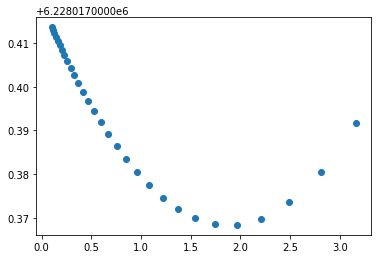

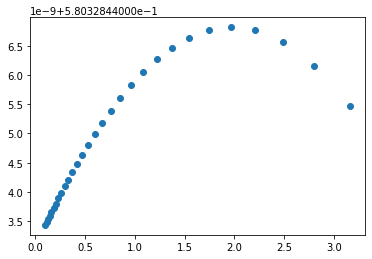

In [108]:
import matplotlib.pyplot as plt

list_x = alphas_2
list_y = avg_mse_2
list_y2 = avg_r2_2 
list_y3 = avg_mae_2

plt.scatter(list_x, list_y)
plt.show()

plt.scatter(list_x, list_y2)
plt.show()

## (5) Performance comparison on the test set and draw conclusions. 
- Retraining with the whole training dataset using the selected hyperparameters
- Apply on the test set and draw conclusions

In [139]:
x_trainval_cat = x_trainval[['Promo','DayOfWeek','Assortment','StoreType','NowPromo2','NewPromo2']]
x_trainval_num = x_trainval[['CompetitionLevel','CompetitionOpen','SalesPerCustomer']]

x_test_cat = x_test[['Promo','DayOfWeek','Assortment','StoreType','NowPromo2','NewPromo2']]
x_test_num = x_test[['CompetitionLevel','CompetitionOpen','SalesPerCustomer']]

In [140]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(x_trainval_cat)

x_trainval_cat_ohe = ohe.transform(x_trainval_cat)
x_test_cat_ohe = ohe.transform(x_test_cat)

In [141]:
scaler = StandardScaler()
scaler.fit(x_trainval_num)

x_trainval_num_scaled = scaler.transform(x_trainval_num)
x_test_num_scaled = scaler.transform(x_test_num)

In [142]:
x_trainval_trans = np.concatenate([x_trainval_cat_ohe, x_trainval_num_scaled], axis=1)
x_test_trans = np.concatenate([x_test_cat_ohe, x_test_num_scaled], axis=1)

In [144]:
# tran Lasso again with the best hyperparameter
lasso = Lasso(alpha=0.001, random_state=0)
lasso.fit(x_trainval_trans, y_trainval)

# get the final performance on test set. 
y_test_hat = lasso.predict(x_test_trans)

test_score = r2_score(y_test, y_test_hat)
test_mse = mean_squared_error(y_test, y_test_hat)
test_mae = mean_absolute_error(y_test, y_test_hat)

print("Test set score with best hyperparameters: {:.7f}".format(test_score))
print("Test set mse with best hyperparameters: {:.7f}".format(test_mse))
print("Test set mae with best hyperparameters: {:.7f}".format(test_mae))

Test set score with best hyperparameters: 0.6047631
Test set mse with best hyperparameters: 5828578.6611602
Test set mae with best hyperparameters: 1712.9767622


C:\Users\hyoan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e+11, tolerance: 1.159e+09
  model = cd_fast.enet_coordinate_descent(


In [145]:
# tran Ridge again with the best hyperparameter
ridge = Ridge(alpha=1.963828, random_state=0)
ridge.fit(x_trainval_trans, y_trainval)

# get the final performance on test set. 
y_test_hat = ridge.predict(x_test_trans)

test_score = r2_score(y_test, y_test_hat)
test_mse = mean_squared_error(y_test, y_test_hat)
test_mae = mean_absolute_error(y_test, y_test_hat)

print("Test set score with best hyperparameters: {:.7f}".format(test_score))
print("Test set mse with best hyperparameters: {:.7f}".format(test_mse))
print("Test set mae with best hyperparameters: {:.7f}".format(test_mae))

Test set score with best hyperparameters: 0.6047631
Test set mse with best hyperparameters: 5828578.3502042
Test set mae with best hyperparameters: 1712.9756592
